In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
data_to_title = {"heloc": "HELOC", "gaussian": "Synthetic", "pima": "Pima", "heart": "Heart", 'adult': "Adult", 'german': "Credit"}
results = pd.read_csv(f'results/model_perturbation_full.csv')

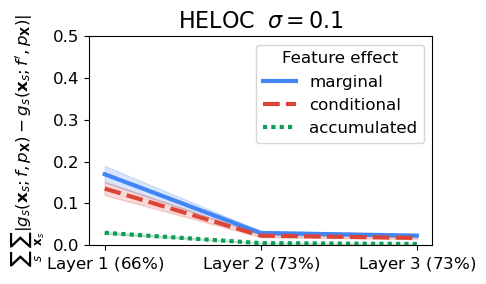

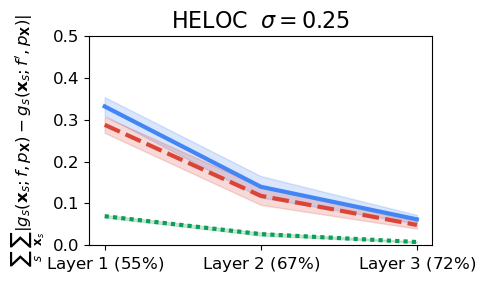

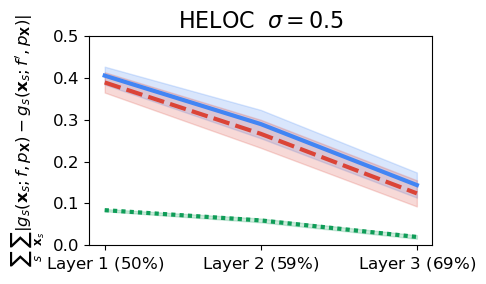

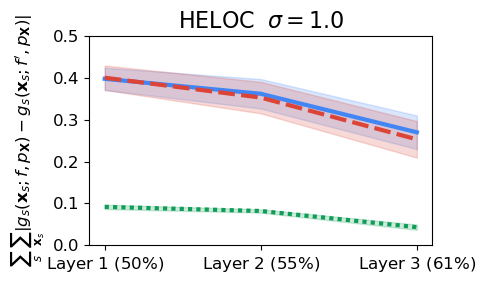

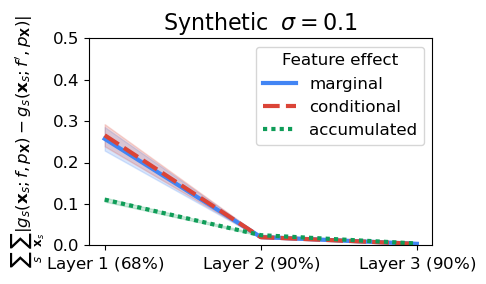

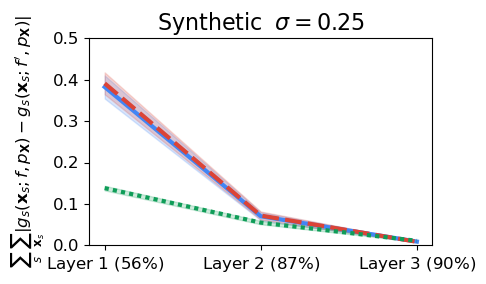

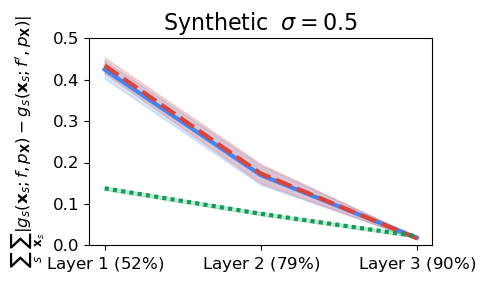

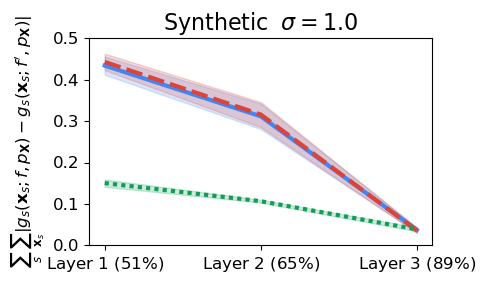

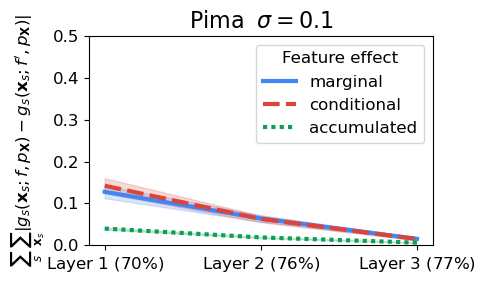

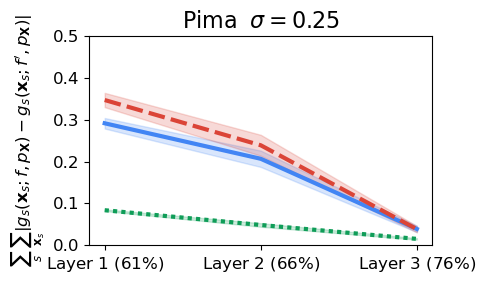

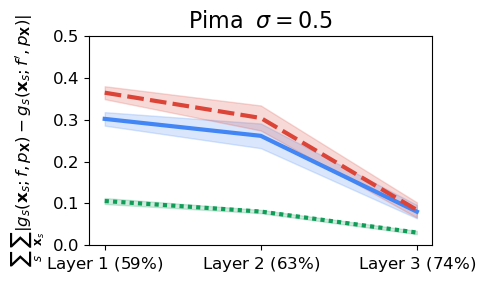

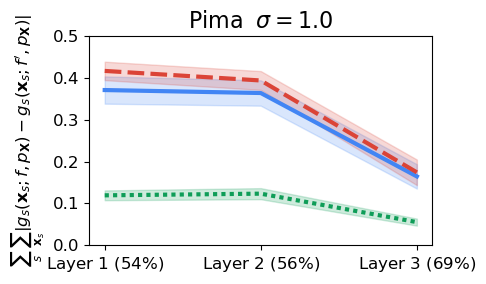

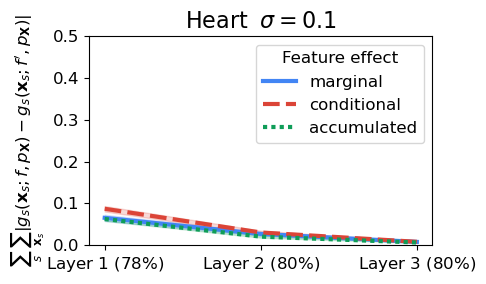

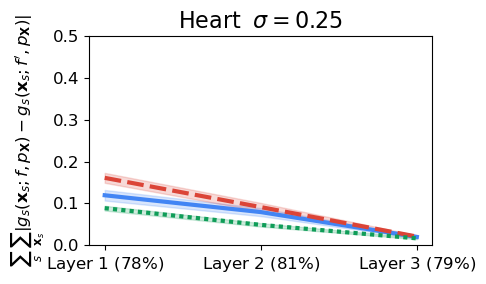

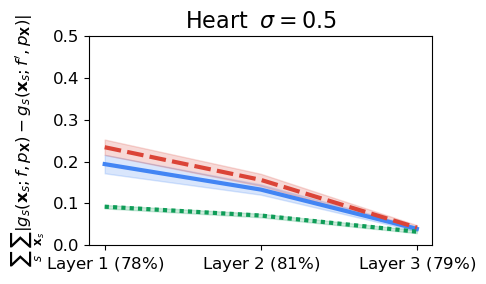

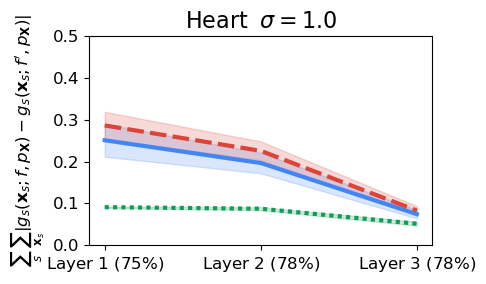

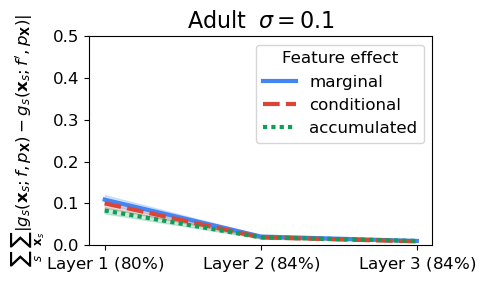

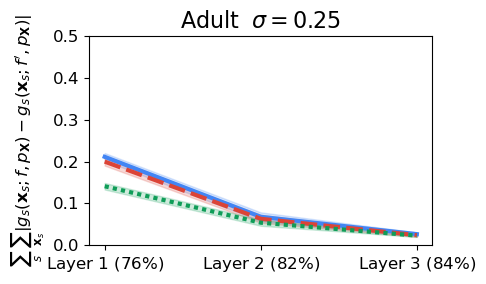

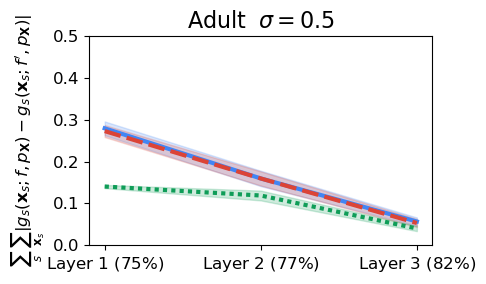

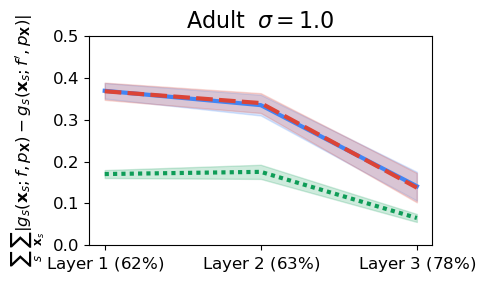

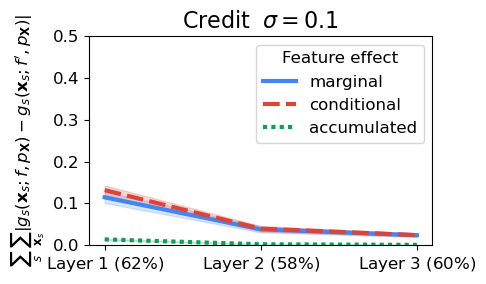

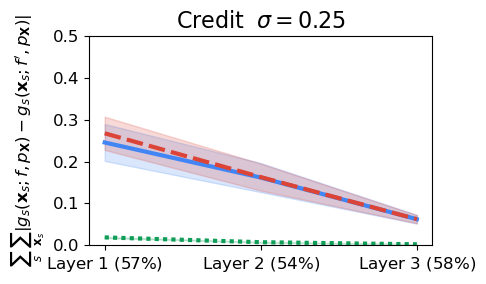

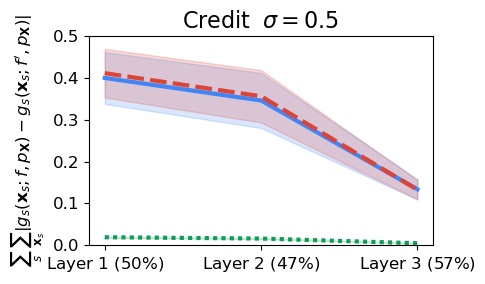

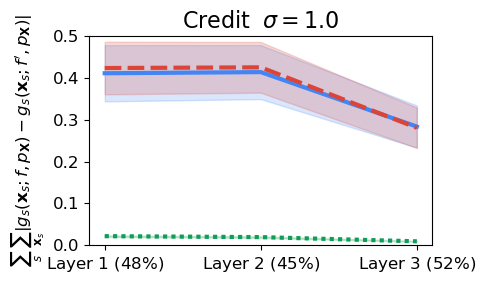

In [3]:
for data_name in ['heloc', 'gaussian', 'pima', 'heart', 'adult', 'german']:
    df_dataset = results.loc[results.dataset == data_name,]
    for iter, sigma in enumerate([0.10, 0.25, 0.50, 1.0]):
        df_sigma = df_dataset.loc[df_dataset.sigma == sigma,]
        df_label = df_sigma.loc[df_sigma.label == "marginal",]
        plt.figure(figsize=(5, 3))
        g = sns.lineplot(
            data=df_sigma,
            x="layer", y="dfe",
            hue="label", style="label",
            errorbar="se",
            linewidth=3,
            palette=["#4285F4", "#DB4437", "#0F9D58"]
        )
        g.set_title(data_to_title[data_name] + f' $\;\sigma={sigma}$', fontsize=BIGGER_SIZE)
        plt.legend(title="Feature effect")
        if iter != 0:
            g.legend().remove()
        plt.xticks([1, 2, 3], 
                [f'Layer {i} (${str(df_label.loc[df_label.layer == i,].performance.mean())[2:4]}$%)' for i in [1, 2, 3]])
        plt.xlabel(None)
        plt.ylabel("$\sum_s \; \sum_{\mathbf{x}_s} | g_s(\mathbf{x}_s; f, p_{\mathbf{X}}) - g_s(\mathbf{x}_s ; f', p_{\mathbf{X}}) |$", fontsize=SMALL_SIZE)
        plt.ylim([0, 0.5])
        plt.tight_layout()
        # plt.savefig(f'../figures/exp2_{data_name}_{sigma}.pdf')
        plt.show()